# Airbnb NYC Data Analysis

In [1]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from pprint import pprint

%matplotlib inline

In [2]:
bnb_df =pd.read_csv('AB_NYC_2019.csv')

In [3]:
bnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

## 1. Question: What wolud you except in terms of pricing by staying a night in NYC ?

(0, 600, 0.0, 3954.3)

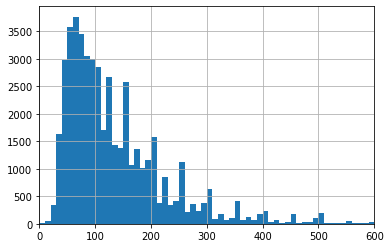

In [5]:
f = bnb_df['price'].hist(bins=1000)
f.axis(xmin=0,xmax=600)

In [6]:
# Mean of the given dataset
bnb_df['price'].mean()

152.7206871868289

In [7]:
# Median of the given dataset
statistics.median(bnb_df['price'])

106

Now we want to put the **prices** in **categories** !  

In [8]:
#This function defines categories from 1 (under 50$/night) to 5 (more then 300$night)
def price_cat_bnb(price):
    if price <50:
        cat= 1
    elif price<100:
        cat= 2
    elif price<200:
        cat= 3
    elif price<300:
        cat= 4
    else:
        cat= 5
    return cat

In [9]:
# Aplly the function to the dataset
bnb_df['price_cat']=bnb_df['price'].apply(price_cat_bnb)

3    17233
2    16850
4     5867
1     5027
5     3918
Name: price_cat, dtype: int64

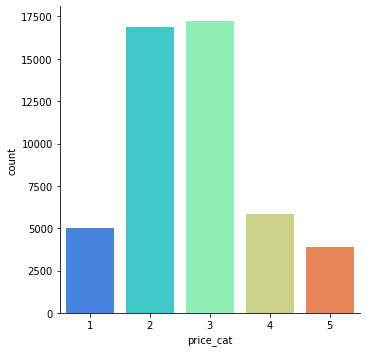

In [10]:
# Show the results for our five classes
sns.catplot('price_cat',data=bnb_df,kind='count',palette='rainbow')
bnb_df['price_cat'].value_counts()

In [11]:
# Let's look up percetnage of each category we created
perc_price_cat= (bnb_df['price_cat'].value_counts()/bnb_df['price_cat'].value_counts().sum())*100

# Absolut min and max values
min_price =bnb_df['price'].min()
max_price =bnb_df['price'].max()

In [12]:
# some facts for the prices per night
print(f'Only {int(np.round(perc_price_cat[1]))}% are under 50 bucks a night,')
print(f'but there are {int(np.round(perc_price_cat[2]))}% beetween 50 and 100 bucks and {int(np.round(perc_price_cat[3]))}% between 100 and 200 dollar.')
print(f"I've you have a lot of money you can spent up to {max_price}$ a night!")

print("\nAll values for the price categories:")
print(perc_price_cat)

Only 10% are under 50 bucks a night,
but there are 34% beetween 50 and 100 bucks and 35% between 100 and 200 dollar.
I've you have a lot of money you can spent up to 10000$ a night!

All values for the price categories:
3    35.244913
2    34.461601
4    11.999182
1    10.281215
5     8.013089
Name: price_cat, dtype: float64


How are the **appartements distributed over the districts** of the city?

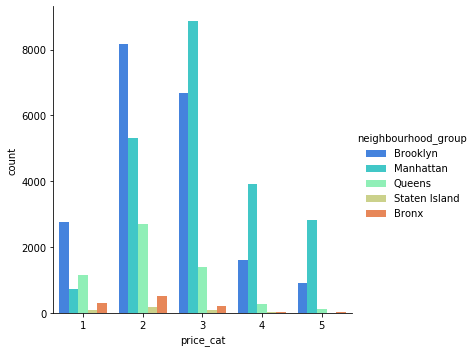

In [13]:
sns.catplot('price_cat',data=bnb_df,kind='count',palette='rainbow',hue='neighbourhood_group')

Looks like there are way more appartements in Broklyn and Manhatten !

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


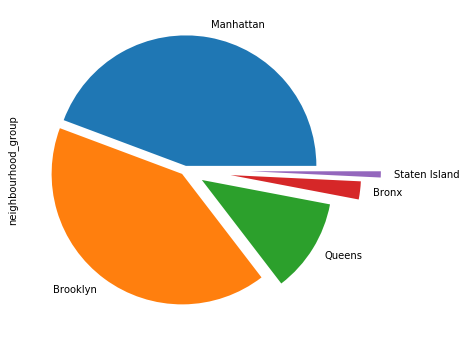

In [14]:
districts=bnb_df['neighbourhood_group'].value_counts()
explode=[0.03,0.04,0.15,0.35,0.5]
print(districts)
districts.plot.pie(figsize=(6,6),explode=explode)

In [36]:
# short the DataFrame so that the data can be used for 
dash_set = bnb_df.dropna()

In [37]:
dash_set = dash_set[0:1000]

In [38]:
dash_set.to_csv(r'./dashFile_Airbnb_1000.csv')

In [28]:
dash_set.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_cat
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,3
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,4
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,4
